## 模型正则化 Regularization
限制某些项系数的大小

### 岭回归Ridge Regression
###### 对于线性回归：
目标函数：$J(θ)=MSE(y,\hat y;θ)$ 
加入模型正则化：

$J(θ)=J(θ)=MSE(y,\hat y;θ)+\frac1 2 α\sum_{i=1}^{n}(θ_{i})^2${1/2方便计算}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

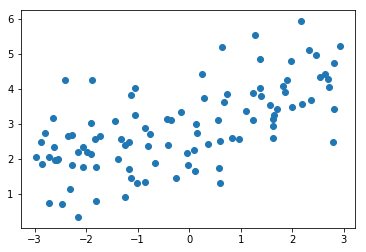

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5*x + 3 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split#数据集分割
np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
from sklearn.pipeline import Pipeline#管道
from sklearn.preprocessing import PolynomialFeatures#构造多项式
from sklearn.preprocessing import StandardScaler#归一化
from sklearn.linear_model import LinearRegression#线性回归

def PolynomialRegression(degree):
    return Pipeline([
        ("Poly",PolynomialFeatures(degree = degree)),#构造多项式
        ("std_scaler",StandardScaler()),#归一化
        ("lin_reg",LinearRegression())#线性回归
    ])

In [5]:
from sklearn.metrics import mean_squared_error#均方差

poly_reg = PolynomialRegression(degree = 20)#使用函数构造管道
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)#计算预测值
mean_squared_error(y_test,y_poly_predict)#计算预测结果和真实值的均方

167.94010867662124

In [6]:
#可视化函数，传入的是fit出来的模型
def plot_model(model):
    #可视化
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color="r")
    plt.axis([-3,3,0,6])
    plt.show()

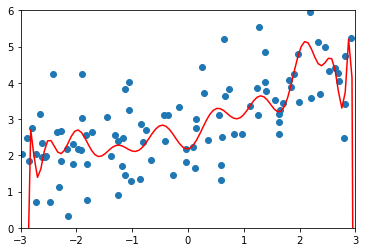

In [7]:
plot_model(poly_reg)#过拟合

### sklearn中的岭回归

In [8]:
from sklearn.linear_model import Ridge#导入岭回归
from sklearn.pipeline import Pipeline#管道
from sklearn.preprocessing import PolynomialFeatures#构造多项式
from sklearn.preprocessing import StandardScaler#归一化

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("Poly",PolynomialFeatures(degree = degree)),#构造多项式
        ("std_scaler",StandardScaler()),#归一化
        ("lin_reg",Ridge(alpha=alpha))#岭回归
    ])

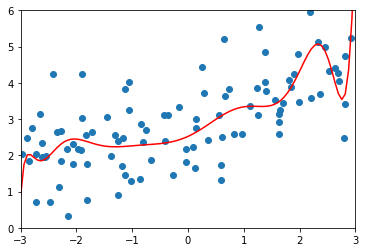

In [9]:
#使用岭回归
ridge1_reg = RidgeRegression(20,0.0001)
ridge1_reg.fit(X_train,y_train)

r1_preidict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,r1_preidict)

plot_model(ridge1_reg)

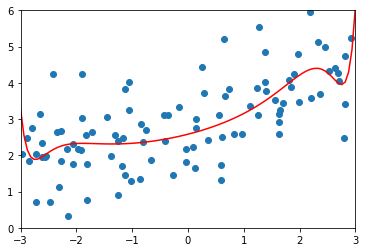

In [10]:
#使用岭回归
ridge2_reg = RidgeRegression(20,1)
ridge2_reg.fit(X_train,y_train)

r2_preidict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,r2_preidict)

plot_model(ridge2_reg)

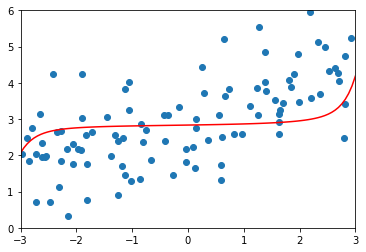

In [11]:
#使用岭回归
ridge3_reg = RidgeRegression(20,1000)
ridge3_reg.fit(X_train,y_train)

r3_preidict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,r3_preidict)

plot_model(ridge3_reg)

### 我们通过对心得超参数α，和dgree进行调整，最终找到一个方差和偏差的平衡点

### LASSO回归 LASSO Regression
###### 对于线性回归：
目标函数：$J(θ)=MSE(y,\hat y;θ)$ 
加入模型正则化：

$J(θ)=J(θ)=MSE(y,\hat y;θ)+α\sum_{i=1}^{n}|θ_{i}|${1/2方便计算}

In [ ]:
from sklearn.linear_model import Ridge#导入岭回归
from sklearn.pipeline import Pipeline#管道
from sklearn.preprocessing import PolynomialFeatures#构造多项式
from sklearn.preprocessing import StandardScaler#归一化

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("Poly",PolynomialFeatures(degree = degree)),#构造多项式
        ("std_scaler",StandardScaler()),#归一化
        ("lin_reg",Ridge(alpha=alpha))#岭回归
    ])